# Lab 1 - Data collection, wrangling, & GIS operations

**Complete all exercises directly in this notebook using Python.**

## Exercise 1 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 1.1: Have a look at the Guardian's version of Wikileaks' Afghanistan war logs. 

</div>





Source is here [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). 

The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:





In [1]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)

<div class="alert alert-block alert-success">
       Exercise 2.2: Download the table as a csv file (File --> Download as --> .csv, current sheet) read it into Python.
</div>


<div class="alert alert-block alert-success">
       Exercise 2.3: Explore it by creating a few plots.
</div>

<div class="alert alert-block alert-success">
       Exercise 2.4: Obtain a monthly total count of casualties and create a line or a bar plot of them.
</div>




In [2]:
!pip install plotly
!pip install cufflinks

     |████████████████████████████████| 25.3 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 1.6 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=313935a17cec551b462bc1815f845b24bac91ed4db9d1c415befbd0ba410e1c4
  Stored in directory: /home/jovyan/.cache/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

afghan = pd.read_csv('afghan_war.csv', skiprows=1)
afghan = afghan.fillna(0)
df = pd.DataFrame(afghan)
df = df.drop(labels=72,axis=0)
df['Taliban'] =df['Taliban'].astype(int)
df['Civilians'] =df['Civilians'].astype(int)
df['Afghan forces'] =df['Afghan forces'].astype(int)
df['Nato (detailed in spreadsheet)'] =df['Nato (detailed in spreadsheet)'].astype(int)
df['Nato - official figures'] =df['Nato - official figures'].astype(int)
df.info()

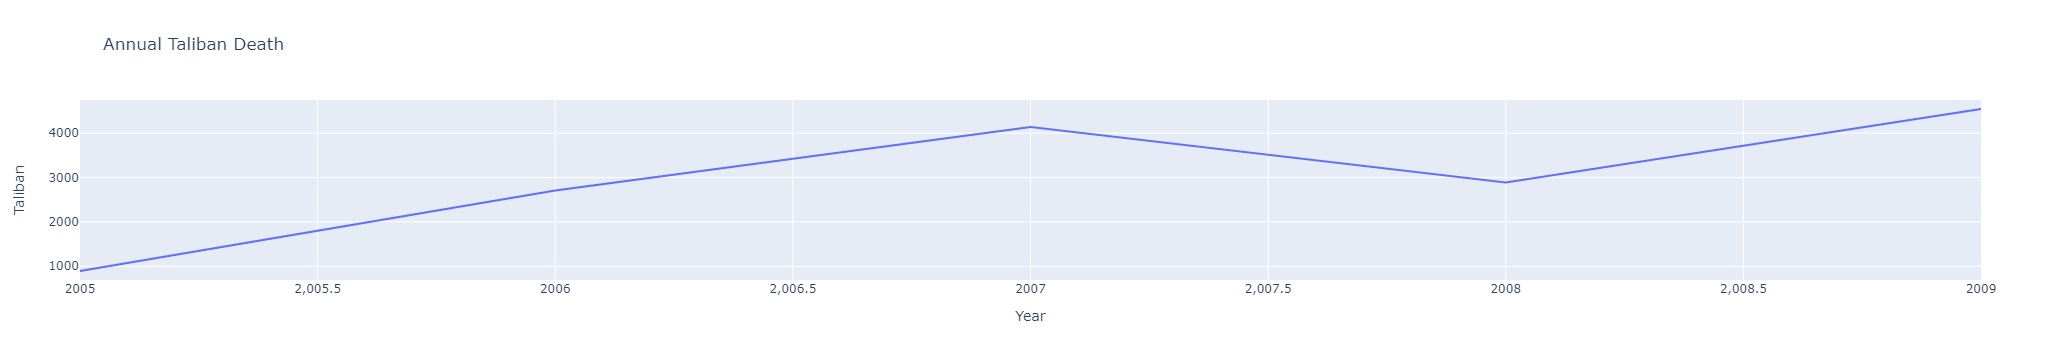

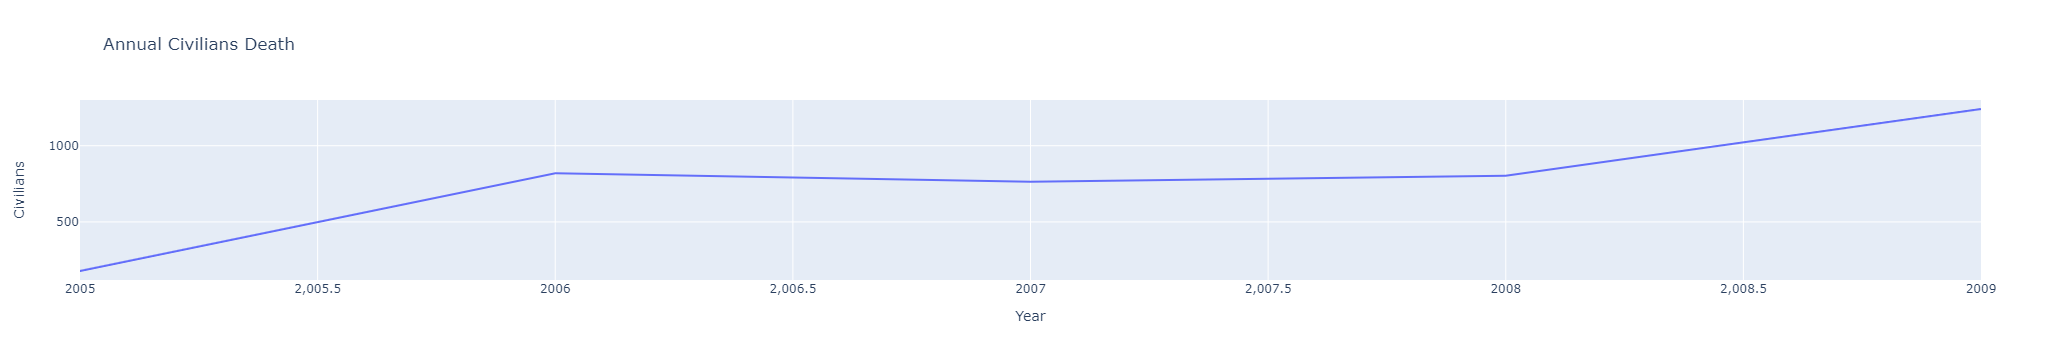

In [15]:
#1.3 Explore it by creating a few plots.
df_new = df.groupby(["Year"]).agg({"Taliban": "sum","Civilians": "sum","Afghan forces": "sum","Nato (detailed in spreadsheet)":"sum","Nato - official figures":"sum"}).sort_values(["Year"]).reset_index()
df_new = df_new.drop(labels=0,axis=0)
df_new.head()
fig = px.line(df_new, x = 'Year', y = 'Taliban', title='Annual Taliban Death')
fig.show()
fig = px.line(df_new, x = 'Year', y = 'Civilians', title='Annual Civilians Death')
fig.show()

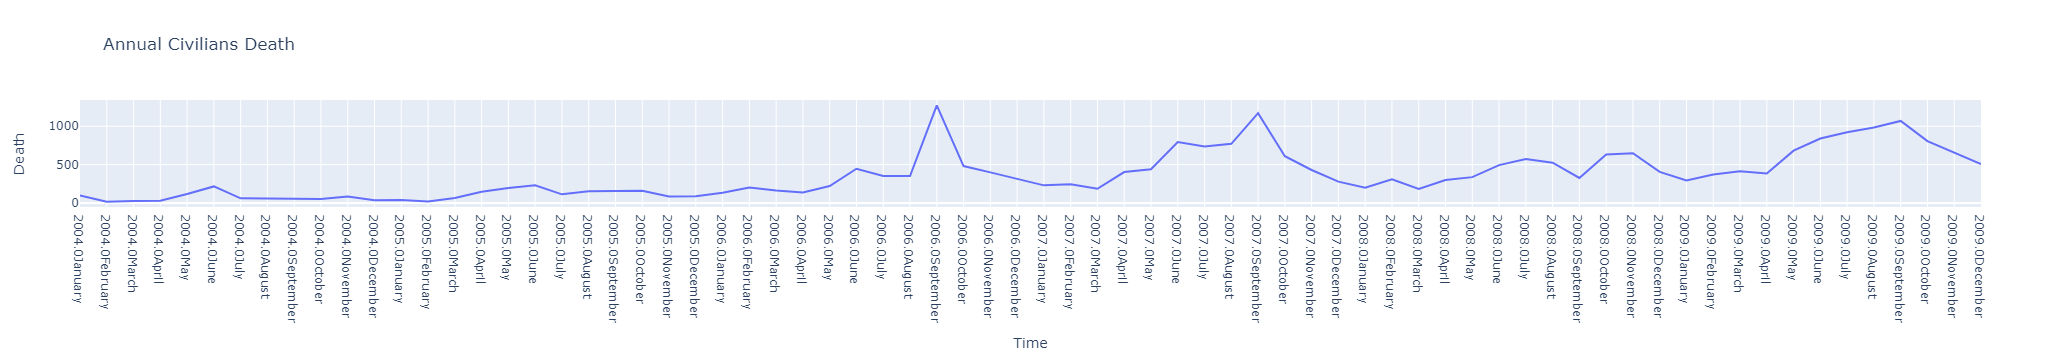

In [16]:
#1.4
df["Death"] = (df['Taliban']+df['Civilians']+df['Nato (detailed in spreadsheet)']+df['Nato - official figures']+df['Afghan forces'])
df['Year'] =df['Year'].astype(str)
df["Time"] = (df['Year']+df['Month'])
fig = px.line(df, x = 'Time', y = 'Death', title='Annual Civilians Death')
fig.show()

!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install rasterio## Exercise 2 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 2.1: Read the rivers data
</div>
<div class="alert alert-block alert-success">
       Exercise 2.2: Read the first 5 rows of the rivers dataset
</div>
<div class="alert alert-block alert-success">
       Exercise 2.3: Visualize rivers dataset. 
</div>



In [5]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install rasterio

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point

In [38]:
#Excercise 2
rivers = gpd.read_file('rivers.gpkg') #2.1 Read the rivers data
rivers.head() #2.2 Read the first 5 rows of the rivers dataset

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



dissolve  scalerank       featurecla             name name_alt  \
0               0River        1.0            River  Irrawaddy Delta     None   
1  1001Lake Centerline        9.0  Lake Centerline        Tonle Sap     None   
2            1001River        9.0            River        Tonle Sap     None   
3  1002Lake Centerline        9.0  Lake Centerline          Sheksna     None   
4            1002River        9.0            River          Sheksna     None   

   rivernum  note  min_zoom    name_en  min_label  ...    name_pl  \
0         0  None       2.0  Irrawaddy        3.0  ...    Irawadi   
1      1001  None       7.1       None        8.1  ...  Tonle Sap   
2      1001  None       7.1       None        8.1  ...  Tonle Sap   
3      1002  None       7.1    Sheksna        8.1  ...    Szeksna   
4      1002  None       7.1    Sheksna        8.1  ...    Szeksna   

       name_pt   name_ru    name_sv        name_tr           name_vi name_zh  \
0  Rio Irauádi   Иравади  Irrawaddy  İravadi Nehri  Sông Ayeyarwaddy   伊洛瓦底江   
1         None  Тонлесап       None           None              None    None   
2         None  Тонлесап       None           None              None    None   
3         None    Шексна    Sjeksna           None              None   舍克斯納河   
4         None    Шексна    Sjeksna           None              None   舍克斯納河   

  wdid_score       ne_id                                           geometry  
0          2  1159109417  MULTILINESTRING ((95.45110 17.82050, 95.42766 ...  
1          4  1159109429  MULTILINESTRING ((103.68743 13.22468, 103.7133...  
2          4  1159109445  MULTILINESTRING ((104.61476 12.38203, 104.6176...  
3          4  1159109447  MULTILINESTRING ((37.73951 59.07954, 37.75733 ...  
4          4  1159109461  MULTILINESTRING ((38.47804 59.21666, 38.48528 ...  

[5 rows x 35 columns]

<AxesSubplot:>

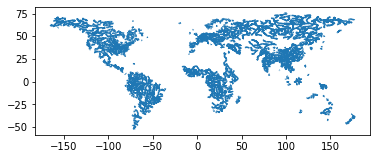

In [39]:
rivers.plot() #2.3 Visualize rivers dataset.

cities = gpd.read_file('/content/cities.geojson')
countries = gpd.read_file('/content/countries.gpkg')## Exercise 3 (2 points) 

<div class="alert alert-block alert-success">
       Exercise 3.1: Convert the cities data into EPSG:3395 and plot cities on top of countries data projected into EPSG:3395
</div>

<div class="alert alert-block alert-success">
       Exercise 3.2: Save the projected cities file you created in exercise 2.1 into a file
</div>

In [30]:
#3.1
cities = gpd.read_file('cities.geojson')
countries = gpd.read_file('countries.gpkg')

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


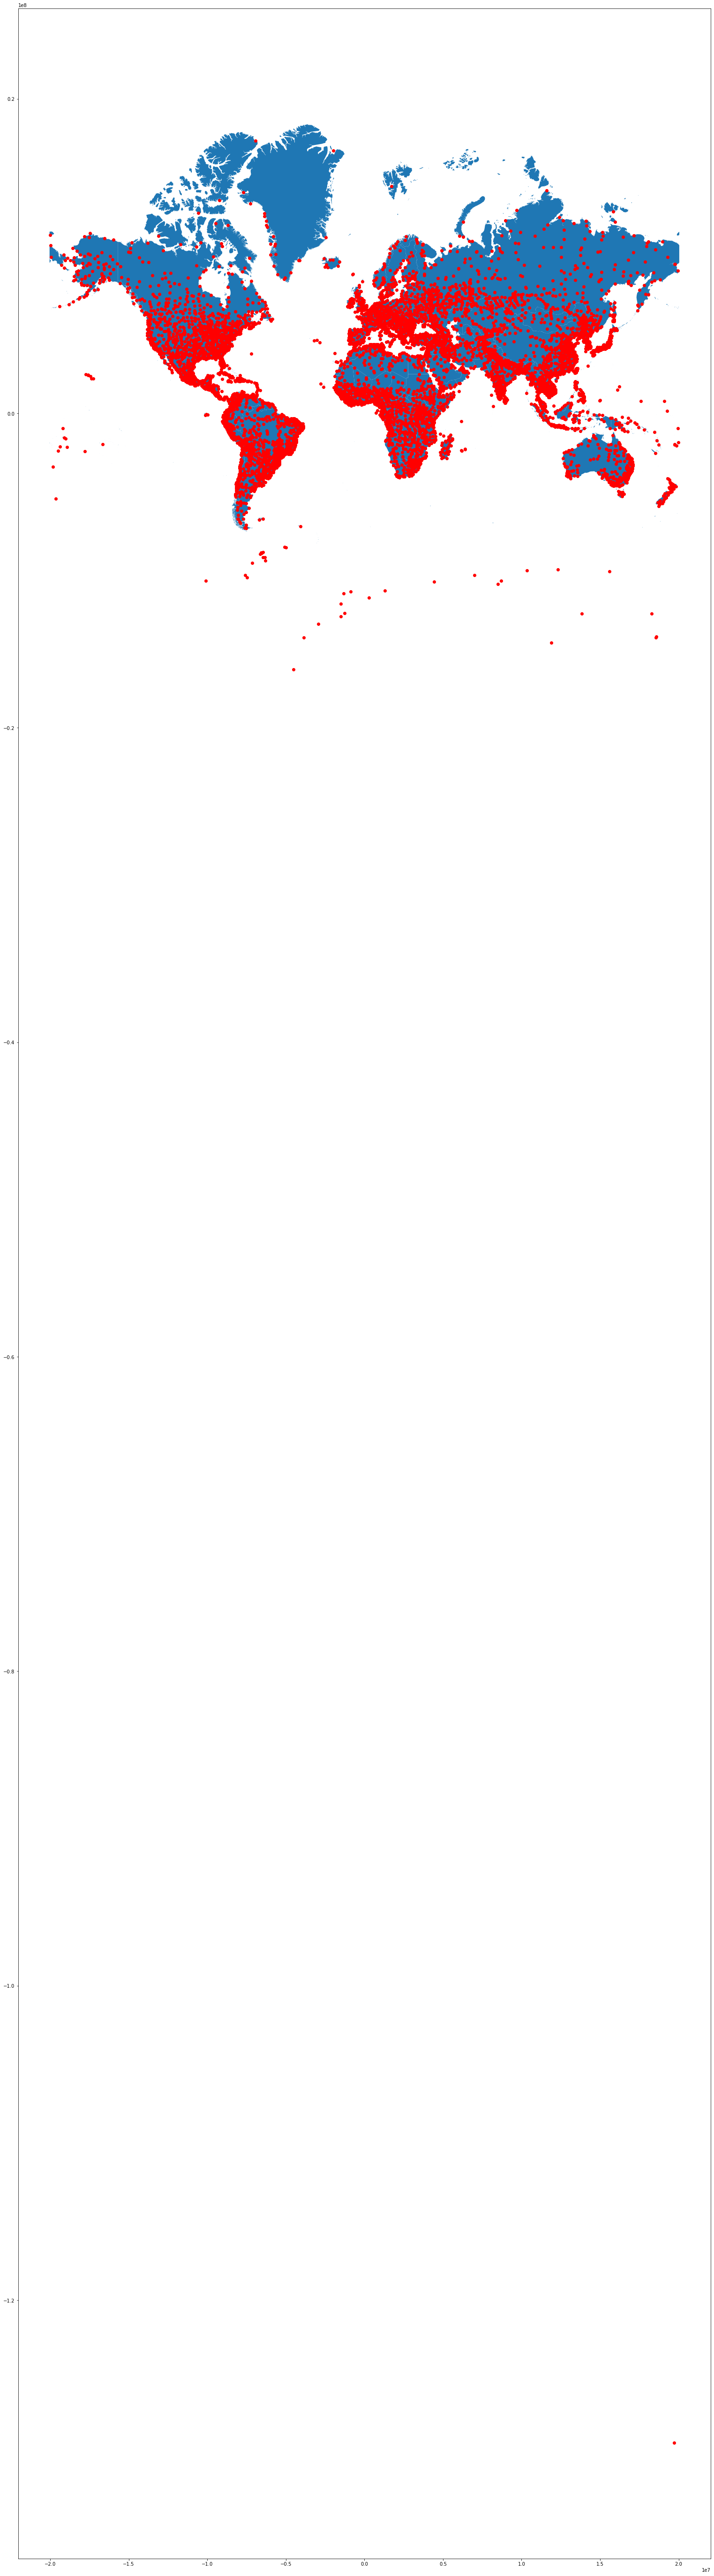

In [31]:
cities.crs #Check CRS
countries.crs

cities_reproj = cities.to_crs({'init':'epsg:3395'}) #reproject files into EPSG:3395
coutries_reproj =countries.to_crs({'init':'epsg:3395'})

fig, ax = plt.subplots(figsize = (50,100))
coutries_reproj.plot(ax=ax)
cities_reproj.plot(ax=ax, color='r') #The result is unsatisfactory


## Exercise 4 (7 points)

<div class="alert alert-block alert-success">
       Exercise 4.1: Use cenpy to collect any three variables at the censuss tract geograhy for a city of your choice. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.2: Check and report the correlation amongst the variables
</div>

<div class="alert alert-block alert-success">
       Exercise 4.3: Use statsmodels to conduct a basic regression on the variables (one as the dependent and two as independent variables). Determine if any are statistically significant. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.4: Use cenpy to collect county geometries and peform a spatial join with tracts (We want to know which county eaach tract is within). 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.5: Aggregate one of the variables by county and map it. 
</div>

In [36]:
!pip install cenpy
import cenpy as cen
from cenpy import products
acs = cen.products.ACS()

In [54]:
acs.tables #Examine the tables
acs.filter_tables('INCOME', by='description')
acs.filter_variables('C27016_001E')

label  \
C27016_001E  Estimate!!Total   

                                                       concept predicateType  \
C27016_001E  HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...           int   

              group limit predicateOnly  \
C27016_001E  C27016     0           NaN   

                                        attributes required values  
C27016_001E  C27016_001EA,C27016_001M,C27016_001MA      NaN    NaN

In [55]:
Fertility = products.ACS(2017).from_place('Baltimore, MD', level='tract',
                                        variables=['B99132_001E'])
Had_Birth = products.ACS(2017).from_place('Baltimore, MD', level='tract',
                                        variables=['B13002_001E'])
Income = products.ACS(2017).from_place('Baltimore, MD', level='tract',
                                        variables=['C27016_001E'])

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Baltimore, MD to Baltimore city within layer Incorporated Places


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Baltimore, MD to Baltimore city within layer Incorporated Places


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Baltimore, MD to Baltimore city within layer Incorporated Places


In [11]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
corr, _ = pearsonr(Poverty['B17004_001E'], Fertility['B99132_001E']) #Findout the correlation between income and fertility rate
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.806


In [12]:
corr, _ = pearsonr(Had_Birth['B13002_001E'], Fertility['B99132_001E']) #Findout the correlation between female had birth and fertility rate
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [50]:
#Regression model
from sklearn.linear_model import LinearRegression
train_x = Poverty['B17004_001E']
train_y = Fertility['B99132_001E']
train_z = Had_Birth['B13002_001E']
x_train = train_x.values.reshape(-1, 1)
y_train = train_y.values.reshape(-1, 1)
model_1 = LinearRegression().fit(x_train, y_train)
z_train = train_z.values.reshape(-1, 1)
model_2 = LinearRegression().fit(x_train, y_train)

In [15]:
County = products.ACS(2017).from_county('Baltimore, MD', level='county',
                                       variables=['B00001'])

/opt/conda/lib/python3.8/site-packages/cenpy/products.py:993: UserWarning: Cannot disambiguate placename Baltimore, MD. Picking the shortest, best matched placename, Baltimore, MD, from Baltimore, MD, Baltimore, MD
  warn(
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


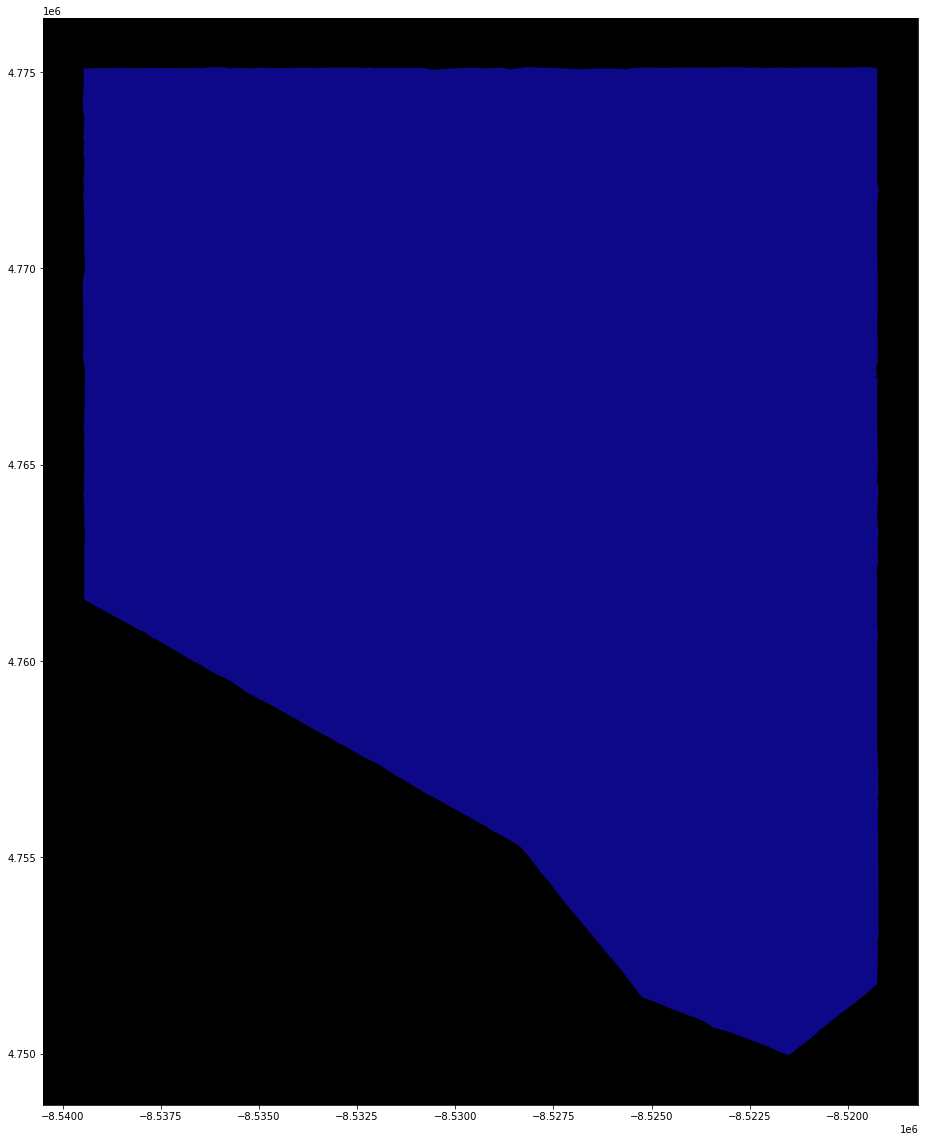

In [16]:
f, ax = plt.subplots(1,1,figsize=(20,20))
County.dropna(subset=['B00001_001E'], axis=0).plot('B00001_001E', ax=ax, cmap='plasma')
ax.set_facecolor('k')

In [44]:
Tract = products.ACS(2017).from_place('Baltimore, MD', level='tract',
                                       variables=['B06011_001E'])

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Baltimore, MD to Baltimore city within layer Incorporated Places


In [19]:
tracts_with_country = gpd.sjoin(Tract ,County, how="inner")

In [23]:
I83C = gpd.read_file('I83_C.geojson')

KeyError: ['C27016_001E']

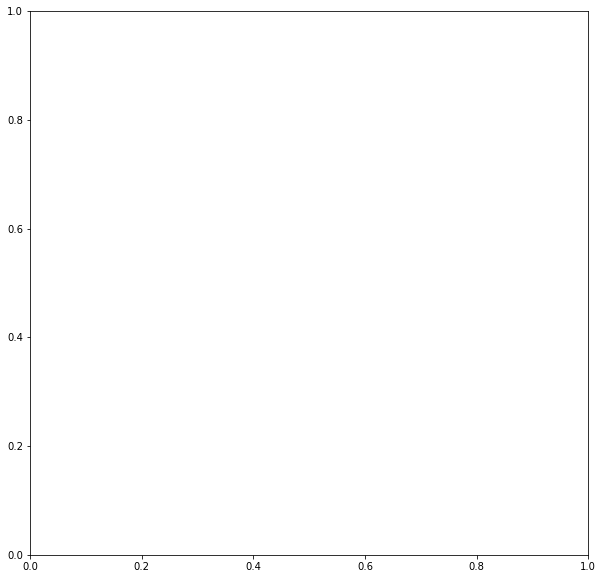

In [56]:
f, ax = plt.subplots(1,1,figsize=(10,10))
tracts_with_country.dropna(subset=['C27016_001E'], axis=0).plot('C27016_001E', ax=ax, cmap='plasma')
plt.title('Poverty Rates in Baltimore')
ax.set_facecolor('k')


<AxesSubplot:>

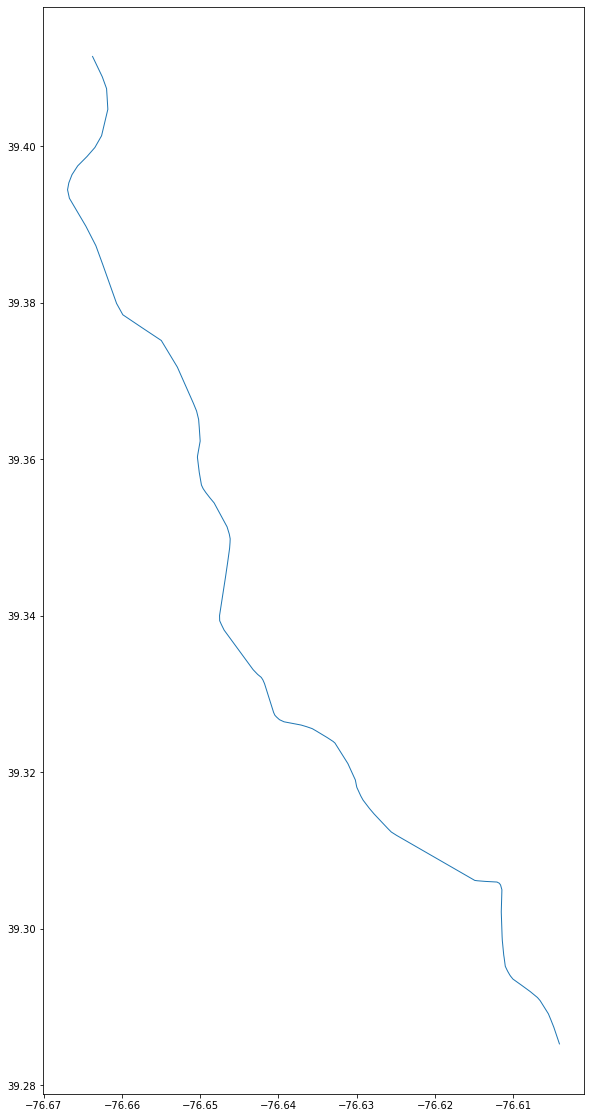

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
I83C.plot(linewidth=1, ax=ax)

## Exercise 5 (10 points) 

**Read all tasks below before choosing data. This exercise might be useful toward preliminary project ideas.**

<div class="alert alert-block alert-success">
       Exercise 5.1: Collect any three geographic datasets that overlap to at least some degree (at least one must be vector; use at least two different sources of data; at least one must be polygon; two must be automatically collected).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.2: Plot them together on a single map.
</div>

<div class="alert alert-block alert-success">
       Exercise 5.3: Perform a buffer operation on one of your datasets and map the results (use centroids if needed. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.4: Perform two additional different GIS operationss on your data and map the results of each. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.5: Perform a join on two of the datasets (spatial or aspatial). One dataset must be the outcome of a GIS operation from exercises 5.3/5.4
</div>

<div class="alert alert-block alert-success">
       Exercise 5.6: Create a new variable for one of the datasets that sums/counts a geographic feature of another dataset (can be original or derivative of previous task).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.7: Create a new variable for one of the datasets that sums/counts an attribute feature of another dataset (can be original or derivative of previous task).
</div>

**Save your notebook and make a pull request directed to your branch of the class repository**

#Downloaded Maryland Geology file from Maryland Catalog.
Geology = gpd.read_file('Maryland_GEOLOGY.geojson')

In [46]:
Montgomery = products.ACS(2017).from_county('Montgomery, MD', level='county',)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [48]:
City1 = products.ACS(2017).from_place('Rockville, MD', level='tract',
                                       variables=['B00001'])

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: Rockville, MD to Rockville city within layer Incorporated Places


In [49]:
Montgomery_proj =Montgomery.to_crs({'init':'epsg:3395'})
Geology_reproj =Geology.to_crs({'init':'epsg:3395'})
City1 = City1.to_crs({'init':'epsg:3395'})

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [50]:
fig, ax = plt.subplots(figsize=(200,400))
Geology_reproj.plot(ax=ax)
Montgomery_proj.plot(ax=ax, color='r')
City1.dropna(subset=['B00001_001E'], axis=0).plot('B00001_001E', ax=ax, cmap='plasma')

<AxesSubplot:>

<AxesSubplot:>

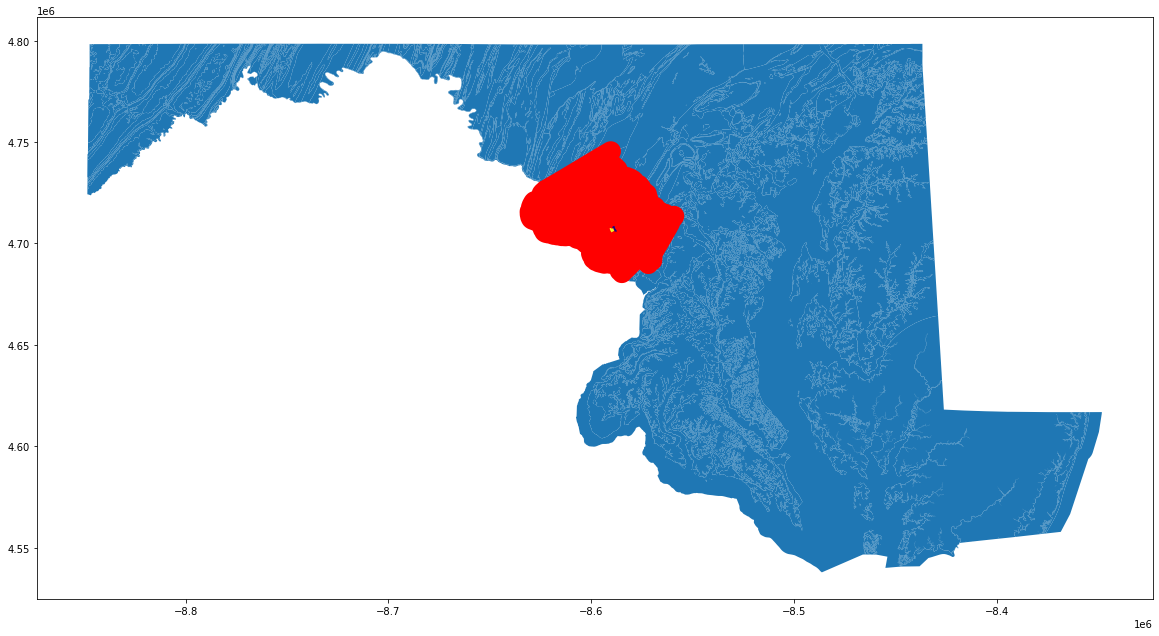

In [51]:
buffer = Montgomery_proj.buffer(5000)
fig, ax = plt.subplots(figsize = (20,40))
Geology_reproj.plot(ax=ax)
buffer.plot(ax=ax, color='r')
City1.dropna(subset=['B00001_001E'], axis=0).plot('B00001_001E', ax=ax, cmap='plasma')

In [53]:
from shapely.geometry import Polygon, LineString, Point

In [54]:
clipped_GEO = gpd.clip(Geology_reproj, Montgomery_proj)

<AxesSubplot:>

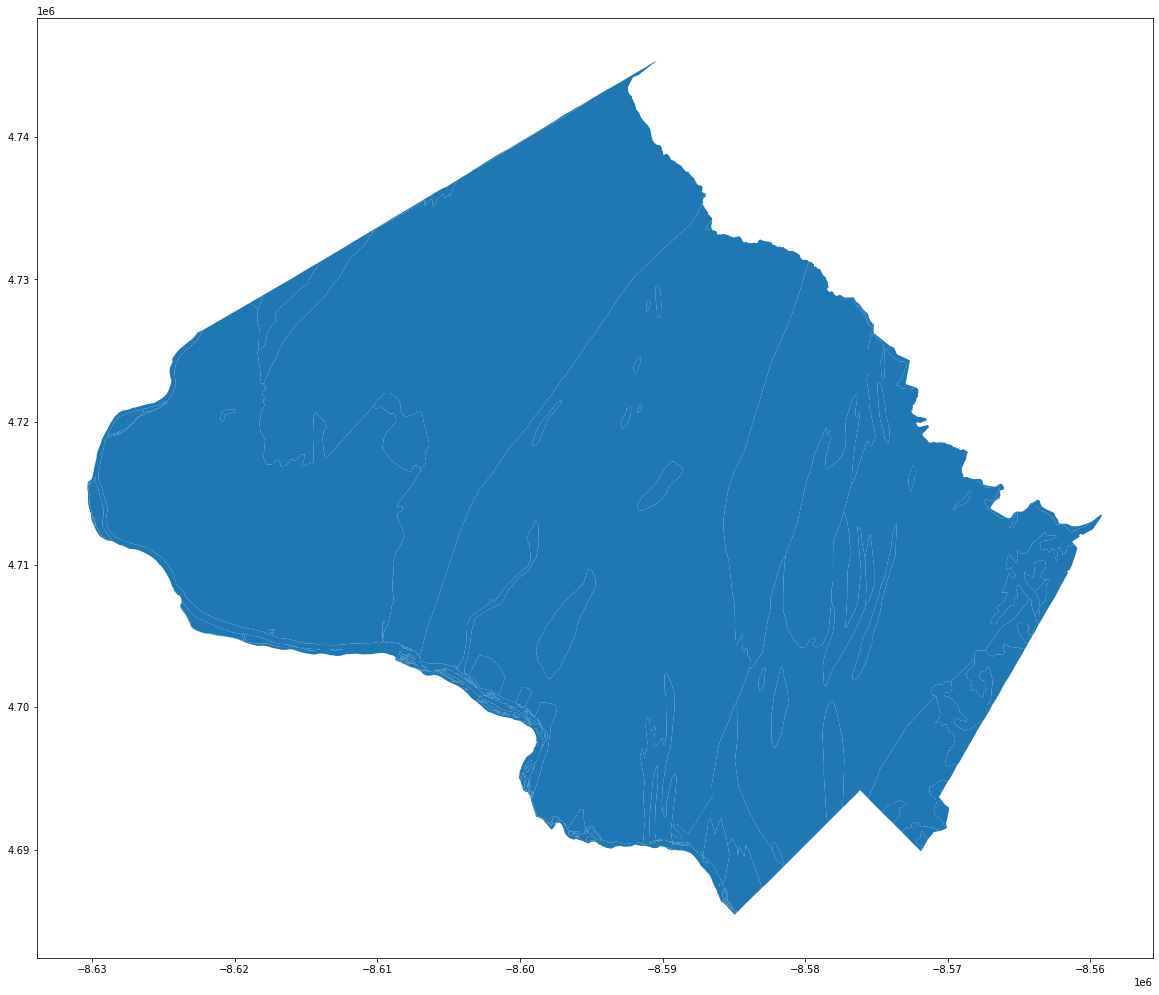

In [55]:
fig, ax = plt.subplots(figsize = (20,40))
clipped_GEO.plot(ax=ax)

In [56]:
City2 = City1[City1.geometry.within(Montgomery_proj)]

/opt/conda/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning:

The indices of the two GeoSeries are different.



In [57]:
City2

GEOID                                           geometry  \
0  24031701005  POLYGON ((-8590962.370 4707451.854, -8590951.1...   

   B00001_001E state county   tract  
0        326.0    24    031  701005

In [63]:
Join = gpd.sjoin(clipped_GEO, City2, how="inner", )

In [64]:
Join

OBJECTID mdgeology_ symbl_1             name_1968         formation  \
1536     1537       1553      pb  Upper Pelitic Schist  Prettyboy Schist   

     order_nbr        class major_rock                   other_rock  \
1536        26  metamorphic     schist  lenses of schisty quartzite   

            era  ...            groupings                Shape.area  \
1536  Paleozoic  ...  Westminster Terrane  627517136.55787980556488   

                   Shape.len  \
1536  252452.085718672664370   

                                               geometry index_right  \
1536  POLYGON ((-8596791.923 4691658.302, -8596777.4...           0   

            GEOID B00001_001E state county   tract  
1536  24031701005       326.0    24    031  701005  

[1 rows x 31 columns]

In [65]:
print(f"The major rock type in Rockville is {Join['major_rock']} and some {Join['other_rock']}" )

The major rock type in Rockville is 1536    schist
Name: major_rock, dtype: object and some 1536    lenses of schisty quartzite
Name: other_rock, dtype: object
